In [1]:
import json
from collections import defaultdict
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re

/home/cmu/miniconda3/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("d1shs0ap/cognitive-behaviors-Llama-3.2-3B")

In [13]:
normal_rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/train-5-5-normal-2048/72_rollouts.json"
with open(normal_rollouts_file, 'r') as f:
    normal_rollouts = json.load(f)

In [14]:
positive_rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/train-5-5-positive-2048/72_rollouts.json"
with open(positive_rollouts_file, 'r') as f:
    positive_rollouts = json.load(f)

In [94]:
positive_solved_only_positive_1_length, positive_solved_only_positive_0_length, positive_solved_only_normal_0_length = [], [], []
positive_solved_only_positive_1_attempts, positive_solved_only_positive_0_attempts, positive_solved_only_normal_0_attempts = [], [], []

normal_solved_only_normal_1_length, normal_solved_only_normal_0_length, normal_solved_only_positive_0_length = [], [], []
normal_solved_only_normal_1_attempts, normal_solved_only_normal_0_attempts, normal_solved_only_positive_0_attempts = [], [], []

for i in range(len(normal_rollouts) // 8):

    if normal_rollouts[i * 8]['ref_score'] != 5:
        continue
    
    normal_1_length, positive_1_length = [], []
    normal_0_length, positive_0_length = [], []

    normal_1_attempts, positive_1_attempts = [], []
    normal_0_attempts, positive_0_attempts = [], []
    
    for j in range(8):

        if normal_rollouts[i * 8 + j]['score'] == 1:
            normal_1_length.append(normal_rollouts[i * 8 + j]['length'])
            normal_1_attempts.append(len(set(normal_rollouts[i * 8 + j]['output'].split('\n\n'))))
        
        else:
            normal_0_length.append(normal_rollouts[i * 8 + j]['length'])
            normal_0_attempts.append(len(set(normal_rollouts[i * 8 + j]['output'].split('\n\n'))))

        if positive_rollouts[i * 8 + j]['score'] == 1:
            positive_1_length.append(positive_rollouts[i * 8 + j]['length'])
            positive_1_attempts.append(len(set(positive_rollouts[i * 8 + j]['output'].split('\n\n'))))
        else:
            positive_0_length.append(positive_rollouts[i * 8 + j]['length'])
            positive_0_attempts.append(len(set(positive_rollouts[i * 8 + j]['output'].split('\n\n'))))
    
    # positive solved only
    if len(normal_1_length) == 0 and len(positive_1_length) != 0:
        positive_solved_only_positive_1_length.append(sum(positive_1_length) / len(positive_1_length))
        positive_solved_only_positive_1_attempts.append(sum(positive_1_attempts) / len(positive_1_attempts))
        
        if len(positive_0_length) != 0:
            positive_solved_only_positive_0_length.append(sum(positive_0_length) / len(positive_0_length))
            positive_solved_only_positive_0_attempts.append(sum(positive_0_attempts) / len(positive_0_attempts))
        
        positive_solved_only_normal_0_length.append(sum(normal_0_length) / len(normal_0_length))
        positive_solved_only_normal_0_attempts.append(sum(normal_0_attempts) / len(normal_0_attempts))
    
    # normal solved only
    if len(positive_1_length) == 0 and len(normal_1_length) != 0:
        normal_solved_only_normal_1_length.append(sum(normal_1_length) / len(normal_1_length))
        normal_solved_only_normal_1_attempts.append(sum(normal_1_attempts) / len(normal_1_attempts))
        
        if len(normal_0_length) != 0:
            normal_solved_only_normal_0_length.append(sum(normal_0_length) / len(normal_0_length))
            normal_solved_only_normal_0_attempts.append(sum(normal_0_attempts) / len(normal_0_attempts))
        
        normal_solved_only_positive_0_length.append(sum(positive_0_length) / len(positive_0_length))
        normal_solved_only_positive_0_attempts.append(sum(positive_0_attempts) / len(positive_0_attempts))

In [95]:
print("Solved only by positive, positive avg correct length", sum(positive_solved_only_positive_1_length) / len(positive_solved_only_positive_1_length))
print("Solved only by positive, positive avg correct attempts", sum(positive_solved_only_positive_1_attempts) / len(positive_solved_only_positive_1_attempts))

print("Solved only by positive, positive avg incorrect length", sum(positive_solved_only_positive_0_length) / len(positive_solved_only_positive_0_length))
print("Solved only by positive, positive avg incorrect attempts", sum(positive_solved_only_positive_0_attempts) / len(positive_solved_only_positive_0_attempts))

print("Solved only by positive, normal avg incorrect length", sum(positive_solved_only_normal_0_length) / len(positive_solved_only_normal_0_length))
print("Solved only by positive, normal avg incorrect attempts", sum(positive_solved_only_normal_0_attempts) / len(positive_solved_only_normal_0_attempts))

Solved only by positive, positive avg correct length 1027.611111111111
Solved only by positive, positive avg correct attempts 20.055555555555557
Solved only by positive, positive avg incorrect length 1941.2666666666667
Solved only by positive, positive avg incorrect attempts 31.049206349206354
Solved only by positive, normal avg incorrect length 2028.8333333333333
Solved only by positive, normal avg incorrect attempts 48.958333333333336


In [96]:
print("Solved only by normal, normal avg correct length", sum(normal_solved_only_normal_1_length) / len(normal_solved_only_normal_1_length))
print("Solved only by normal, normal avg correct attempts", sum(normal_solved_only_normal_1_attempts) / len(normal_solved_only_normal_1_attempts))

print("Solved only by normal, normal avg incorrect length", sum(normal_solved_only_normal_0_length) / len(normal_solved_only_normal_0_length))
print("Solved only by normal, normal avg incorrect attempts", sum(normal_solved_only_normal_0_attempts) / len(normal_solved_only_normal_0_attempts))

print("Solved only by normal, positive avg incorrect length", sum(normal_solved_only_positive_0_length) / len(normal_solved_only_positive_0_length))
print("Solved only by normal, positive avg incorrect attempts", sum(normal_solved_only_positive_0_attempts) / len(normal_solved_only_positive_0_attempts))

Solved only by normal, normal avg correct length 1198.0453296703297
Solved only by normal, normal avg correct attempts 29.157051282051277
Solved only by normal, normal avg incorrect length 1799.6296296296296
Solved only by normal, normal avg incorrect attempts 43.96455026455026
Solved only by normal, positive avg incorrect length 1720.2211538461538
Solved only by normal, positive avg incorrect attempts 31.58653846153846


In [91]:
matched = 0
total = 0
for i, row in enumerate(positive_rollouts):
    if row['ref_score'] != 5:
        continue
    before_think = row['output'].split('</think>')[0]
    match = re.search(re.escape(before_think[-150:]), row['output'][:-150])
    if match:
        matched += 1
        print(i)
    total += 1
print("Matched: ", matched)
print("Total: ", total)

2561
2564
2566
2590
2593
2597
2604
2606
2608
2612
2616
2619
2623
2624
2626
2629
2631
2637
2642
2645
2648
2655
2661
2662
2663
2683
2696
2747
2749
2750
2751
2765
2770
2773
2775
2792
2794
2803
2809
2812
2814
2833
2840
2841
2845
2846
2849
2852
2855
2857
2858
2860
2861
2864
2869
2870
2888
2896
2898
2899
2901
2914
2916
2918
2921
2924
2925
2926
2927
2946
2949
2955
2958
2961
2962
2983
3000
3001
3005
3012
3019
3033
3034
3035
3039
3064
3069
3071
3079
3091
3093
3094
3095
3122
3123
3125
3154
3155
3156
3157
3171
3173
3179
3182
3192
3196
3197
3198
3220
3260
3276
3329
3331
3332
3336
3339
3343
3345
3349
3351
3385
3392
3393
3394
3395
3396
3398
3399
3408
3409
3420
3421
3424
3472
3477
3478
3506
3525
3537
3540
3552
3553
3555
3557
3559
3560
3567
3568
3575
3601
3603
3608
3609
3610
3611
3614
3616
3617
3622
3623
3624
3626
3628
3629
3631
3632
3634
3635
3637
3645
3647
3667
3674
3675
3691
3693
3699
3701
3703
3712
3716
3736
3738
3744
3751
3760
3767
3770
3773
3774
3776
3778
3779
3780
3781
3782
3783
3798
3799
3815


In [ ]:
def get_lengths(rollouts):
    correct_lengths_by_difficulty = defaultdict(list)
    incorrect_lengths_by_difficulty = defaultdict(list)

    for i in range(len(rollouts) // 8):
        difficulty = rollouts[i * 8]['ref_score']
        correct_length = 0
        incorrect_length = 0
        correct_count = 0
        incorrect_count = 0
        
        for j in range(8):
            row = rollouts[i * 8 + j]

            if row['score'] == 0:
                incorrect_length += row['length']
                incorrect_count += 1
            elif row['score'] == 1:
                correct_length += row['length']
                correct_count += 1
        
        correct_lengths_by_difficulty[difficulty].append(correct_length / correct_count if correct_count > 0 else 0)
        incorrect_lengths_by_difficulty[difficulty].append(incorrect_length / incorrect_count if incorrect_count > 0 else 0)
    
    return correct_lengths_by_difficulty, incorrect_lengths_by_difficulty

-1944.83977702192 -247.26475468975468
0.0 0.0
356.5719305794607 -97.96003256003253
446.68045267489714 -176.30841543513958
-2198.832272432783 -73.14669738863286
0.0 0.0
52.614488966318234 -19.89957482993198
-5.813416149068328 30.350443262411343


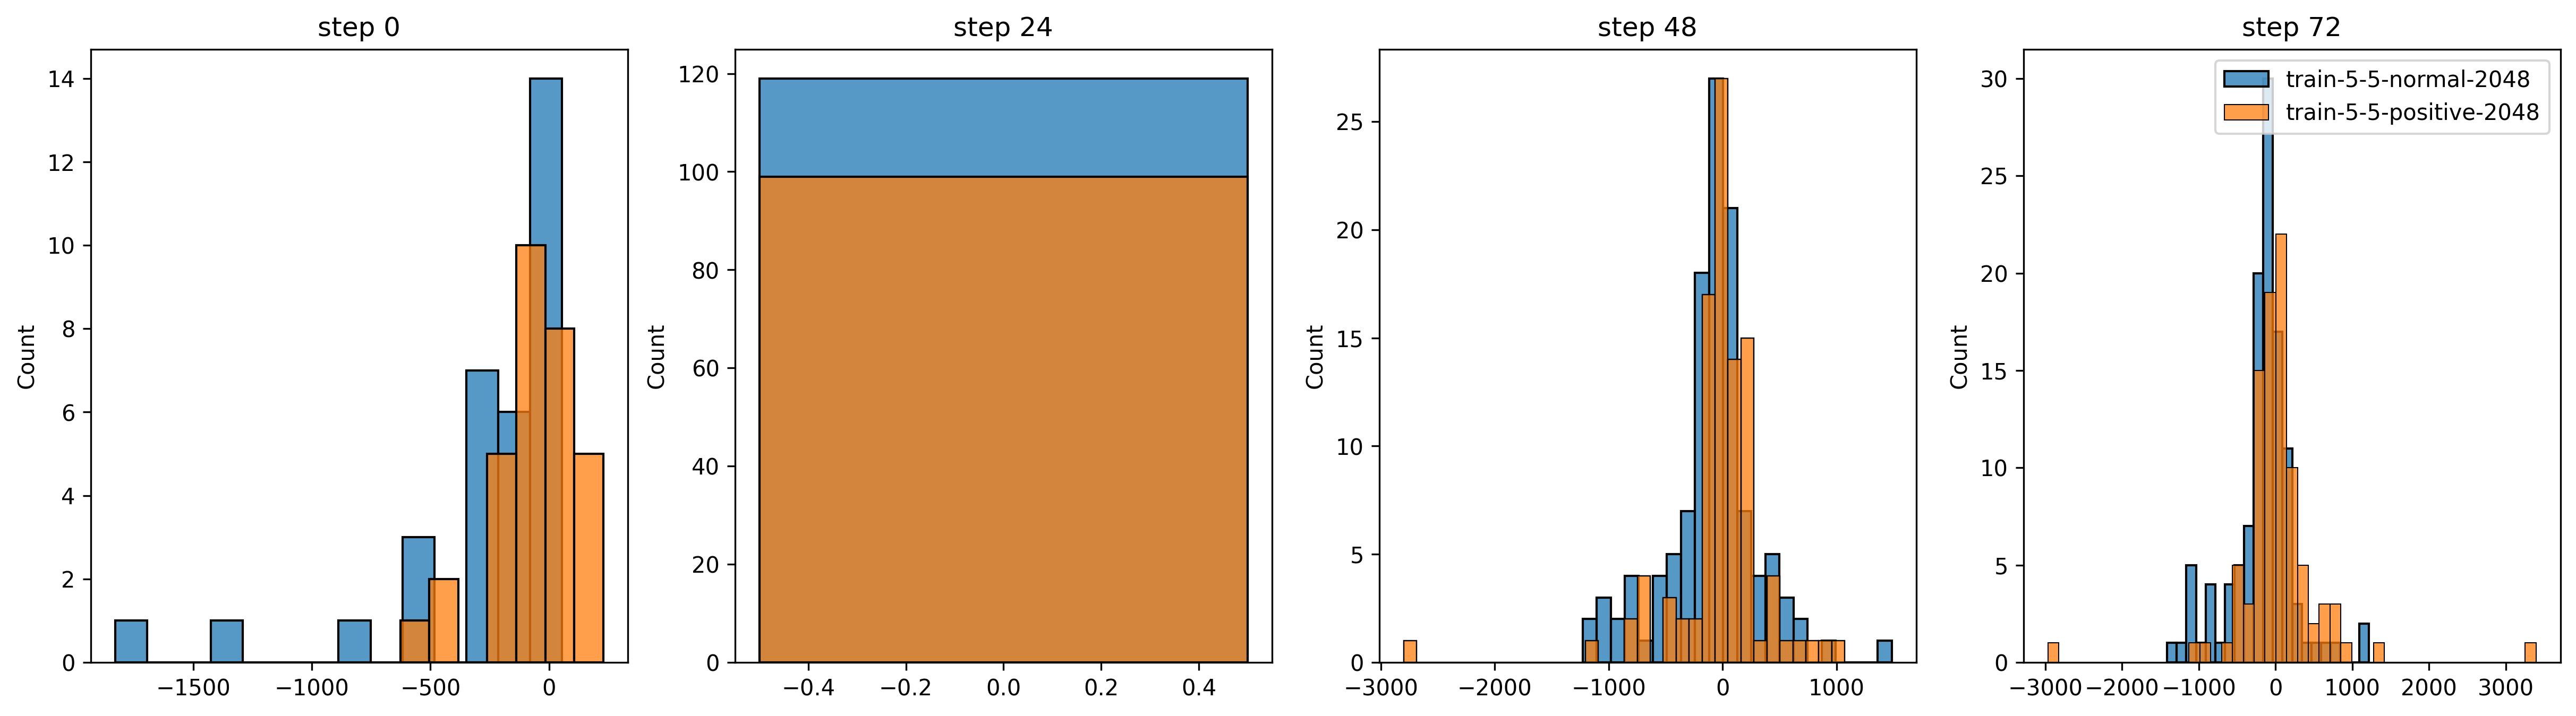

<Figure size 640x480 with 0 Axes>

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), dpi=300)
for folder in ['train-5-5-normal-2048', 'train-5-5-positive-2048']:

    base_rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/{folder}/24_extrapolation_rollouts.json"
    with open(base_rollouts_file, 'r') as f:
        base_rollouts = json.load(f)
    
    base_correct_lengths_by_difficulty, base_incorrect_lengths_by_difficulty = get_lengths(base_rollouts)
    
    for i, step in enumerate(range(0, 72 + 1, 24)):
        rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/{folder}/{step}_extrapolation_rollouts.json"
        with open(rollouts_file, 'r') as f:
            rollouts = json.load(f)
        
        correct_lengths_by_difficulty, incorrect_lengths_by_difficulty = get_lengths(rollouts)
        for j, difficulty in enumerate(range(5, 6)):

            correct_diffs = []
            for base_length, length in zip(base_correct_lengths_by_difficulty[difficulty], correct_lengths_by_difficulty[difficulty]):
                if length == 0 or base_length == 0:
                    continue
                correct_diffs.append(length - base_length)

            incorrect_diffs = []
            for base_length, length in zip(base_incorrect_lengths_by_difficulty[difficulty], incorrect_lengths_by_difficulty[difficulty]):
                if length == 0 or base_length == 0:
                    continue
                incorrect_diffs.append(length - base_length)

            print(sum(incorrect_diffs) / len(incorrect_diffs), sum(correct_diffs) / len(correct_diffs))
            sns.histplot(x=correct_diffs, ax=ax[i], label=folder)
            # sns.histplot(x=incorrect_diffs, ax=ax[i], label=folder)
            # if i == 0:
            #     fig.text(0.19 + 0.133 * j, 0.9, f"difficulty {difficulty}", ha='center', fontsize=12)
            ax[i].set_title(f"step {step}")

    # plt.suptitle(folder, y=0.93)

plt.legend()
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
plt.clf()

In [102]:
rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/train-5-5-normal-2048/72_rollouts.json"
with open(rollouts_file, 'r') as f:
    rollouts = json.load(f)

correct_lengths_by_difficulty, incorrect_lengths_by_difficulty = get_lengths(rollouts)

correct_lengths_by_difficulty[5]

[1130.0,
 786.125,
 637.625,
 0,
 413.0,
 1663.0,
 1668.0,
 0,
 0,
 505.25,
 979.6,
 1306.1666666666667,
 0,
 566.75,
 994.4,
 545.125,
 384.625,
 625.0,
 351.0,
 652.25,
 996.8,
 406.625,
 695.875,
 0,
 291.0,
 801.5,
 0,
 405.5,
 758.1666666666666,
 0,
 439.375,
 420.875,
 554.1428571428571,
 333.5,
 682.6,
 0,
 920.2857142857143,
 1121.75,
 0,
 667.0,
 669.75,
 1376.0,
 1361.0,
 914.0,
 680.625,
 1504.0,
 451.0,
 491.375,
 694.0,
 0,
 0,
 320.375,
 511.125,
 667.0,
 359.75,
 1405.25,
 544.75,
 1912.0,
 351.875,
 0,
 362.75,
 388.2,
 360.875,
 0,
 373.375,
 417.75,
 0,
 1482.0,
 302.875,
 1104.8333333333333,
 0,
 652.25,
 319.625,
 721.8571428571429,
 0,
 289.0,
 1137.0,
 674.1428571428571,
 437.0,
 673.125,
 759.3333333333334,
 284.25,
 723.7142857142857,
 592.5,
 599.0,
 1122.0,
 329.125,
 337.25,
 366.0,
 0,
 412.0,
 593.75,
 312.875,
 1471.5,
 770.6666666666666,
 424.5,
 285.875,
 601.25,
 664.875,
 289.75,
 444.875,
 296.75,
 414.375,
 406.7142857142857,
 0,
 426.25,
 0,
 509.25

In [9]:
rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/hard-both-curriculum/100_rollouts.json"
with open(rollouts_file, 'r') as f:
    rollouts = json.load(f)

In [14]:
for row in rollouts:
    if row['score'] == 1 and row['ref_score'] == 8:
        print(row['output'])
        break

<think>
Let me try to find a way to get to 0.
First, let's try to get close to 0 with the larger numbers:
70-65 = 5 (getting closer to 0)
53-42 = 11 (also getting closer to 0)

Let's try a different approach:
43-13 = 30
30+6 = 36
36+0 = 36 (still not 0)

Let's try:
53-70 = -17
-17+65 = 48
48-43 = 5
5+42 = 47
47+6 = 53
53-13 = 40
40-0 = 40 (still not 0)

Let me try one more approach:
70-65 = 5
5+53 = 58
58-43 = 15
15+42 = 57
57-13 = 44
44-6 = 38
38+0 = 38 (still not 0)

Let's try:
53-42 = 11
11+70 = 81
81-65 = 16
16+43 = 59
59-13 = 46
46-6 = 40
40-0 = 40 (still not 0)

Final attempt:
70-65 = 5
5+53 = 58
58-43 = 15
15+42 = 57
57-6 = 51
51-13 = 38
38+0 = 38 (still not 0)

One last try:
53-42 = 11
11+6 = 17
17+70 = 87
87-65 = 22
22-43 = -21
-21+0 = -21
-21+13 = -8 (moving away from 0)

Aha! Let's try:
53-70 = -17
-17+65 = 48
48-43 = 5
5+42 = 47
47*0 = 0 (This works!)
47*0+6 = 282
282-13 = 269
269-0 = 269 (still not 0)

Final successful attempt:
70-65 = 5
5+43 = 48
48-53 = -5
-5+42 = 37
37+

In [15]:
rollouts_file = f"/home/cmu/countdown-curriculum/checkpoints/hard-length-curriculum/100_rollouts.json"
with open(rollouts_file, 'r') as f:
    rollouts = json.load(f)

In [16]:
for row in rollouts:
    if row['score'] == 1 and row['ref_score'] == 8:
        print(row['output'])
        break

<think>
Let me try to find a path to 298.
First, let's try to get close to 298 with some operations:
96 + 98 = 194, that's close to 298
194 + 63 = 257, getting closer
257 + 69 = 326, too high

Let's try a different approach:
96 + 98 = 194
194 + 69 = 263
263 + 63 = 326
326 - 54 = 272
272 + 43 = 315
315 - 42 = 273
273 + 25 = 298
This works!
</think>
<answer> (96 + 98) + 69 + 63 - 54 + 43 - 42 + 25 </answer>
